#Importing necessary Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection  import train_test_split
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import datasets
from torch.nn import functional as F
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import numpy as np
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline 
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

#Architecture for the Denoising Autoencoder

In [ ]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),nn.ReLU(),
            nn.Linear(128, 64),nn.ReLU(),
            nn.Linear(64, 32),nn.ReLU(),
            nn.Linear(32, 16),nn.ReLU(),
            nn.Linear(16,16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),nn.ReLU(),
            nn.Linear(32, 64),nn.ReLU(),
            nn.Linear(64, 128),nn.ReLU(),
            nn.Linear(128, 256),nn.ReLU(),
            nn.Linear(256,28*28),nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x.view(-1, 784))
        # x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define the data loaders
# data_transform = ToTensor()
kwargs = {'num_workers': 1, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(
            datasets.FashionMNIST('data/fashionmnist', train=True, download=True,
                           transform=transforms.ToTensor()),
            batch_size=128, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
            datasets.FashionMNIST('data/fashionmnist', train=False, transform=transforms.ToTensor()),
            batch_size=128, shuffle=False, **kwargs)


# Define the loss function and optimizer
model = DenoisingAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



#Code for training and testing the AutoEncoder

In [ ]:
def loss_function(recon_x, x):
        loss = F.mse_loss(recon_x,x.view(-1, 784))
        return loss
def train(model,epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data + torch.randn(data.size())*0.2
        # data = data.to(device)
        optimizer.zero_grad()
        recon_batch = model(data)
        loss = loss_function(recon_batch, data)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader),loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))
def test(model,epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data + torch.randn(data.size())*0.2
            # data = data.to(device)
            # print('here')
            recon_batch = model(data)
            test_loss += loss_function(recon_batch, data).item()
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
for epoch in range(1, 16):
  train(model,epoch)
  test(model,epoch)


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.001696
====> Epoch: 1 Average loss: 0.0007
====> Test set loss: 0.0006
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.000589
====> Epoch: 2 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.000537
====> Epoch: 3 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.000485
====> Epoch: 4 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.000482
====> Epoch: 5 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.000480
====> Epoch: 6 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 7 [0/60000 (0%)]	Loss: 0.000465
====> Epoch: 7 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.000474
====> Epoch: 8 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.000468
====> Epoch: 9 Average loss: 0.0005
====> Test set loss: 0.0005
Train Epoch: 10 [0/

#Visualization

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

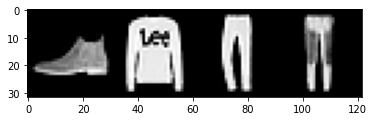

In [ ]:
import torchvision
for images, _ in test_loader:
  break
imshow(torchvision.utils.make_grid(images[:4]))

In [ ]:
model.eval()
with torch.no_grad():
  recon = model(images)

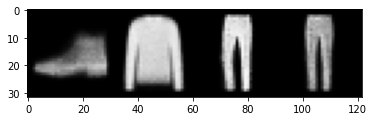

In [ ]:
imshow(torchvision.utils.make_grid(recon[:4].cpu().detach().view(-1,1,28,28)))

#Classifier 1FC Layer

In [125]:
class Classifier_single_layer(nn.Module):
    def __init__(self):
        super(Classifier_single_layer, self).__init__()
        self.fc1 = nn.Linear(16, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return x

#Classifier 3 FC layer

In [126]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(16, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#Training both classifiers

In [127]:
def train_classifier(classifier, train_loader, test_loader, criterion, optimizer, num_epochs):
    # print('a')
    train_losses = []
    test_losses = []
    train_acc = []
    test_acc = []
    for epoch in range(num_epochs):
        train_loss = 0
        test_loss = 0
        correct = 0
        total = 0
        for i, (data, labels) in enumerate(train_loader):
            noisy_data = data+ 0.2*torch.randn(data.shape)
            images = images.view(-1, 28*28)
            noisy_data = noisy_data.view(-1, 28*28)
            # print('here')
            encoded_images = model.encoder(noisy_data)
            # print('bc')
            outputs = classifier(encoded_images)
            # print(outputs)
            # print('hello')
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
            # print(predicted)
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        train_acc.append(100*correct/total)
        # Testing the classifier
        with torch.no_grad():
            correct = 0
            total = 0
            for i, (data, labels) in enumerate(test_loader):
                noisy_data = data+ 0.2*torch.randn(data.shape)
                data = data.view(-1,28*28)
                # print('bc')
                noisy_data = noisy_data.view(-1, 28*28)
                encoded_images = model.encoder(noisy_data)
                # print('Gc')
                outputs = classifier(encoded_images)
                loss = criterion(outputs, labels)
                #print(outputs.size())
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        test_acc.append(100*correct/total)
        print("Epoch: {}/{} | Training Loss: {:.4f} | Testing Loss: {:.4f} | Training Acc: {:.2f}% | Testing Acc: {:.2f}%".format(epoch+1, num_epochs, train_loss, test_loss, train_acc[-1], test_acc[-1]))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.legend()
    plt.show()

In [128]:
print(model)

DenoisingAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=784, bias=True)
    (9): Sigmoid()
  )
)


Epoch: 1/15 | Training Loss: 1.8672 | Testing Loss: 1.5632 | Training Acc: 43.73% | Testing Acc: 54.09%
Epoch: 2/15 | Training Loss: 1.4867 | Testing Loss: 1.4418 | Training Acc: 55.46% | Testing Acc: 55.61%
Epoch: 3/15 | Training Loss: 1.4115 | Testing Loss: 1.3920 | Training Acc: 56.51% | Testing Acc: 56.34%
Epoch: 4/15 | Training Loss: 1.3745 | Testing Loss: 1.3664 | Training Acc: 57.02% | Testing Acc: 56.56%
Epoch: 5/15 | Training Loss: 1.3548 | Testing Loss: 1.3457 | Training Acc: 57.27% | Testing Acc: 56.99%
Epoch: 6/15 | Training Loss: 1.3400 | Testing Loss: 1.3367 | Training Acc: 57.47% | Testing Acc: 57.02%
Epoch: 7/15 | Training Loss: 1.3284 | Testing Loss: 1.3240 | Training Acc: 57.68% | Testing Acc: 57.10%
Epoch: 8/15 | Training Loss: 1.3205 | Testing Loss: 1.3223 | Training Acc: 57.73% | Testing Acc: 57.25%
Epoch: 9/15 | Training Loss: 1.3142 | Testing Loss: 1.3120 | Training Acc: 57.87% | Testing Acc: 57.47%
Epoch: 10/15 | Training Loss: 1.3093 | Testing Loss: 1.3072 | Tr

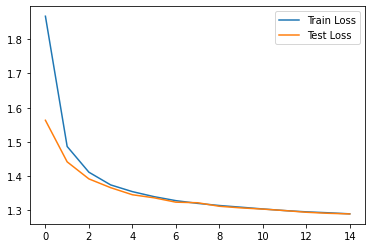

In [129]:
Classifier_single_layer = Classifier_single_layer()
optimizer = torch.optim.Adam(Classifier_single_layer.parameters(), lr=0.001)

train_classifier(Classifier_single_layer,train_loader, test_loader,nn.CrossEntropyLoss(),optimizer,15)

Epoch: 1/15 | Training Loss: 0.8482 | Testing Loss: 0.6433 | Training Acc: 69.68% | Testing Acc: 75.03%
Epoch: 2/15 | Training Loss: 0.5929 | Testing Loss: 0.5946 | Training Acc: 77.78% | Testing Acc: 77.72%
Epoch: 3/15 | Training Loss: 0.5660 | Testing Loss: 0.5759 | Training Acc: 78.97% | Testing Acc: 78.23%
Epoch: 5/15 | Training Loss: 0.5421 | Testing Loss: 0.5549 | Training Acc: 79.94% | Testing Acc: 79.61%
Epoch: 6/15 | Training Loss: 0.5345 | Testing Loss: 0.5527 | Training Acc: 80.21% | Testing Acc: 79.45%
Epoch: 7/15 | Training Loss: 0.5282 | Testing Loss: 0.5426 | Training Acc: 80.48% | Testing Acc: 79.65%
Epoch: 8/15 | Training Loss: 0.5241 | Testing Loss: 0.5465 | Training Acc: 80.54% | Testing Acc: 79.58%
Epoch: 9/15 | Training Loss: 0.5202 | Testing Loss: 0.5450 | Training Acc: 80.70% | Testing Acc: 79.79%
Epoch: 10/15 | Training Loss: 0.5156 | Testing Loss: 0.5464 | Training Acc: 80.85% | Testing Acc: 79.45%
Epoch: 11/15 | Training Loss: 0.5139 | Testing Loss: 0.5353 | T

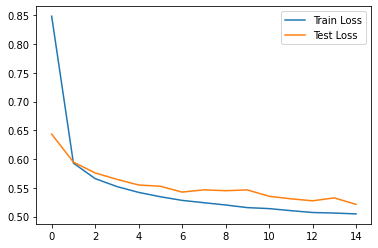

In [130]:
Classifier_3_layer = Classifier()
optimizer = torch.optim.Adam(Classifier_3_layer.parameters(), lr=0.001)

train_classifier(Classifier_3_layer,train_loader, test_loader,nn.CrossEntropyLoss(),optimizer,15)

# First 10 images of the test set and their reconstruction using the 1FC and 3FC layer models.

##1FC

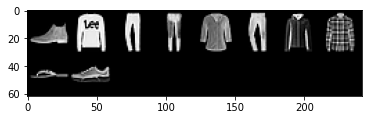

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
import torchvision
for images, _ in test_loader:
  break
imshow(torchvision.utils.make_grid(images[:10]))


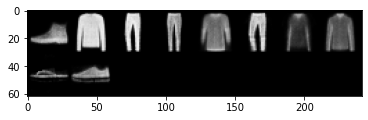

In [ ]:
model.eval()
with torch.no_grad():
  recon = model(images)
imshow(torchvision.utils.make_grid(recon[:10].cpu().detach().view(-1,1,28,28)))
    

##3FC

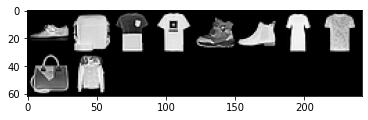

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
import torchvision
for images, _ in test_loader:
  break
imshow(torchvision.utils.make_grid(images[-10:]))


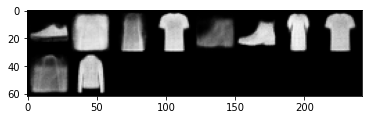

In [ ]:
model.eval()
with torch.no_grad():
  recon = model(images)
imshow(torchvision.utils.make_grid(recon[-10:].cpu().detach().view(-1,1,28,28)))
    

#t-sne Plot

In [ ]:
lt_embed = []
lt_lb = []
ln = 0 
with torch.no_grad():
  for data, lb in test_loader:
    noisy_data = data+ 0.2*torch.randn(data.shape)
    data = data.view(-1, 28*28)
    noisy_data = noisy_data.view(-1, 28*28)
    encoded_images = model.encoder(noisy_data)
            
    outputs = Classifier_single_layer(encoded_images)     #Single FC
    lt_embed.append(outputs)
    lt_lb.append(lb)
    ln+=len(images)
    if(ln>=1000):
      break

# lt_embed = []
# lt_lb = []
# ln = 0 
# with torch.no_grad():
#   for img, lb in test_loader:
#     embed = Classifier_single_layer.encoder(img.to(device).view(-1, 784))
#     lt_embed.append(embed.cpu())
#     lt_lb.append(lb)
#     ln+=len(img)
#     if(ln>=1000):
#       break


In [ ]:
embed_tensor = torch.cat(lt_embed)
label_tensor = torch.cat(lt_lb)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(embed_tensor)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


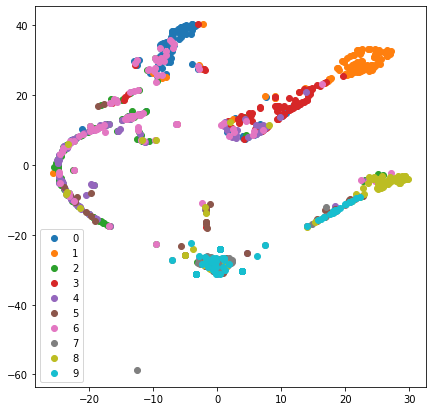

In [ ]:
scatter_x = tsne_data[:,0]
scatter_y = tsne_data[:,1]
group = label_tensor

fig, ax = plt.subplots(figsize=(7, 7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],  label = g)
ax.legend()
plt.show()

In [ ]:
lt_embed = []
lt_lb = []
ln = 0 
with torch.no_grad():
  for images, lb in test_loader:
    noisy_images = images+ 0.2*torch.randn(images.shape)
    images = images.view(-1, 28*28)
    noisy_images = noisy_images.view(-1, 28*28)
    encoded_images = model.encoder(noisy_images)
            
    outputs = Classifier_3_layer(encoded_images)            #3 FC classifier
    lt_embed.append(outputs)
    lt_lb.append(lb)
    ln+=len(images)
    if(ln>=1000):
      break
embed_tensor = torch.cat(lt_embed)
label_tensor = torch.cat(lt_lb)

In [ ]:
tsne2 = TSNE(n_components=2, random_state=0)
tsne_data2 = tsne2.fit_transform(embed_tensor)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


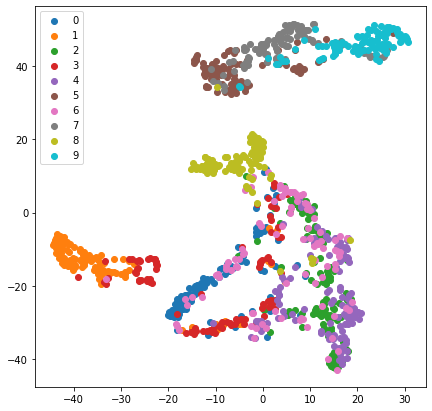

In [ ]:
scatter_x = tsne_data2[:,0]
scatter_y = tsne_data2[:,1]
group = label_tensor

fig, ax = plt.subplots(figsize=(7, 7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],  label = g)
ax.legend()
plt.show()

### From both the t-sne plots we can clearly see that the plot for 3-FC classifier classifies the labels more distinctly and hence we can more distinctly identify the classes. 1FC classifier has less inter class variation than 3FC classifier

##Result


1.   The denoising auto encoder correctly identifies the noise and removes it from embedding
2.   As we can see from the loss curve the difference between predicted and original is minimal and there is no under/over-fitting .
3.   Accuracy of 1FC classifier : 57.8%, Accuracy of 3FC classifier : 80.74%

